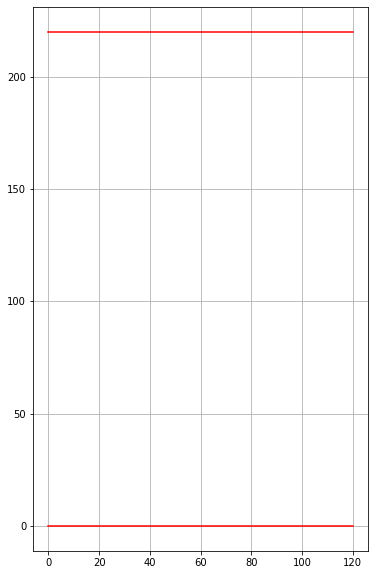

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([0, 0])
xpoints = np.array([0,120])
y2points = np.array([220, 220])
x2points = np.array([0,120])

plt.figure(figsize = (6,10))
plt.plot(xpoints, ypoints,x2points, y2points, linestyle = '-', color='r')

for 
  plt.plot(xpoints, ypoints,x2points, y2points, linestyle = '-', color='r')
plt.grid()
plt.show()

In [ ]:
img = np.zeros((2200,1200,3), dtype=np.uint8)
img*=255

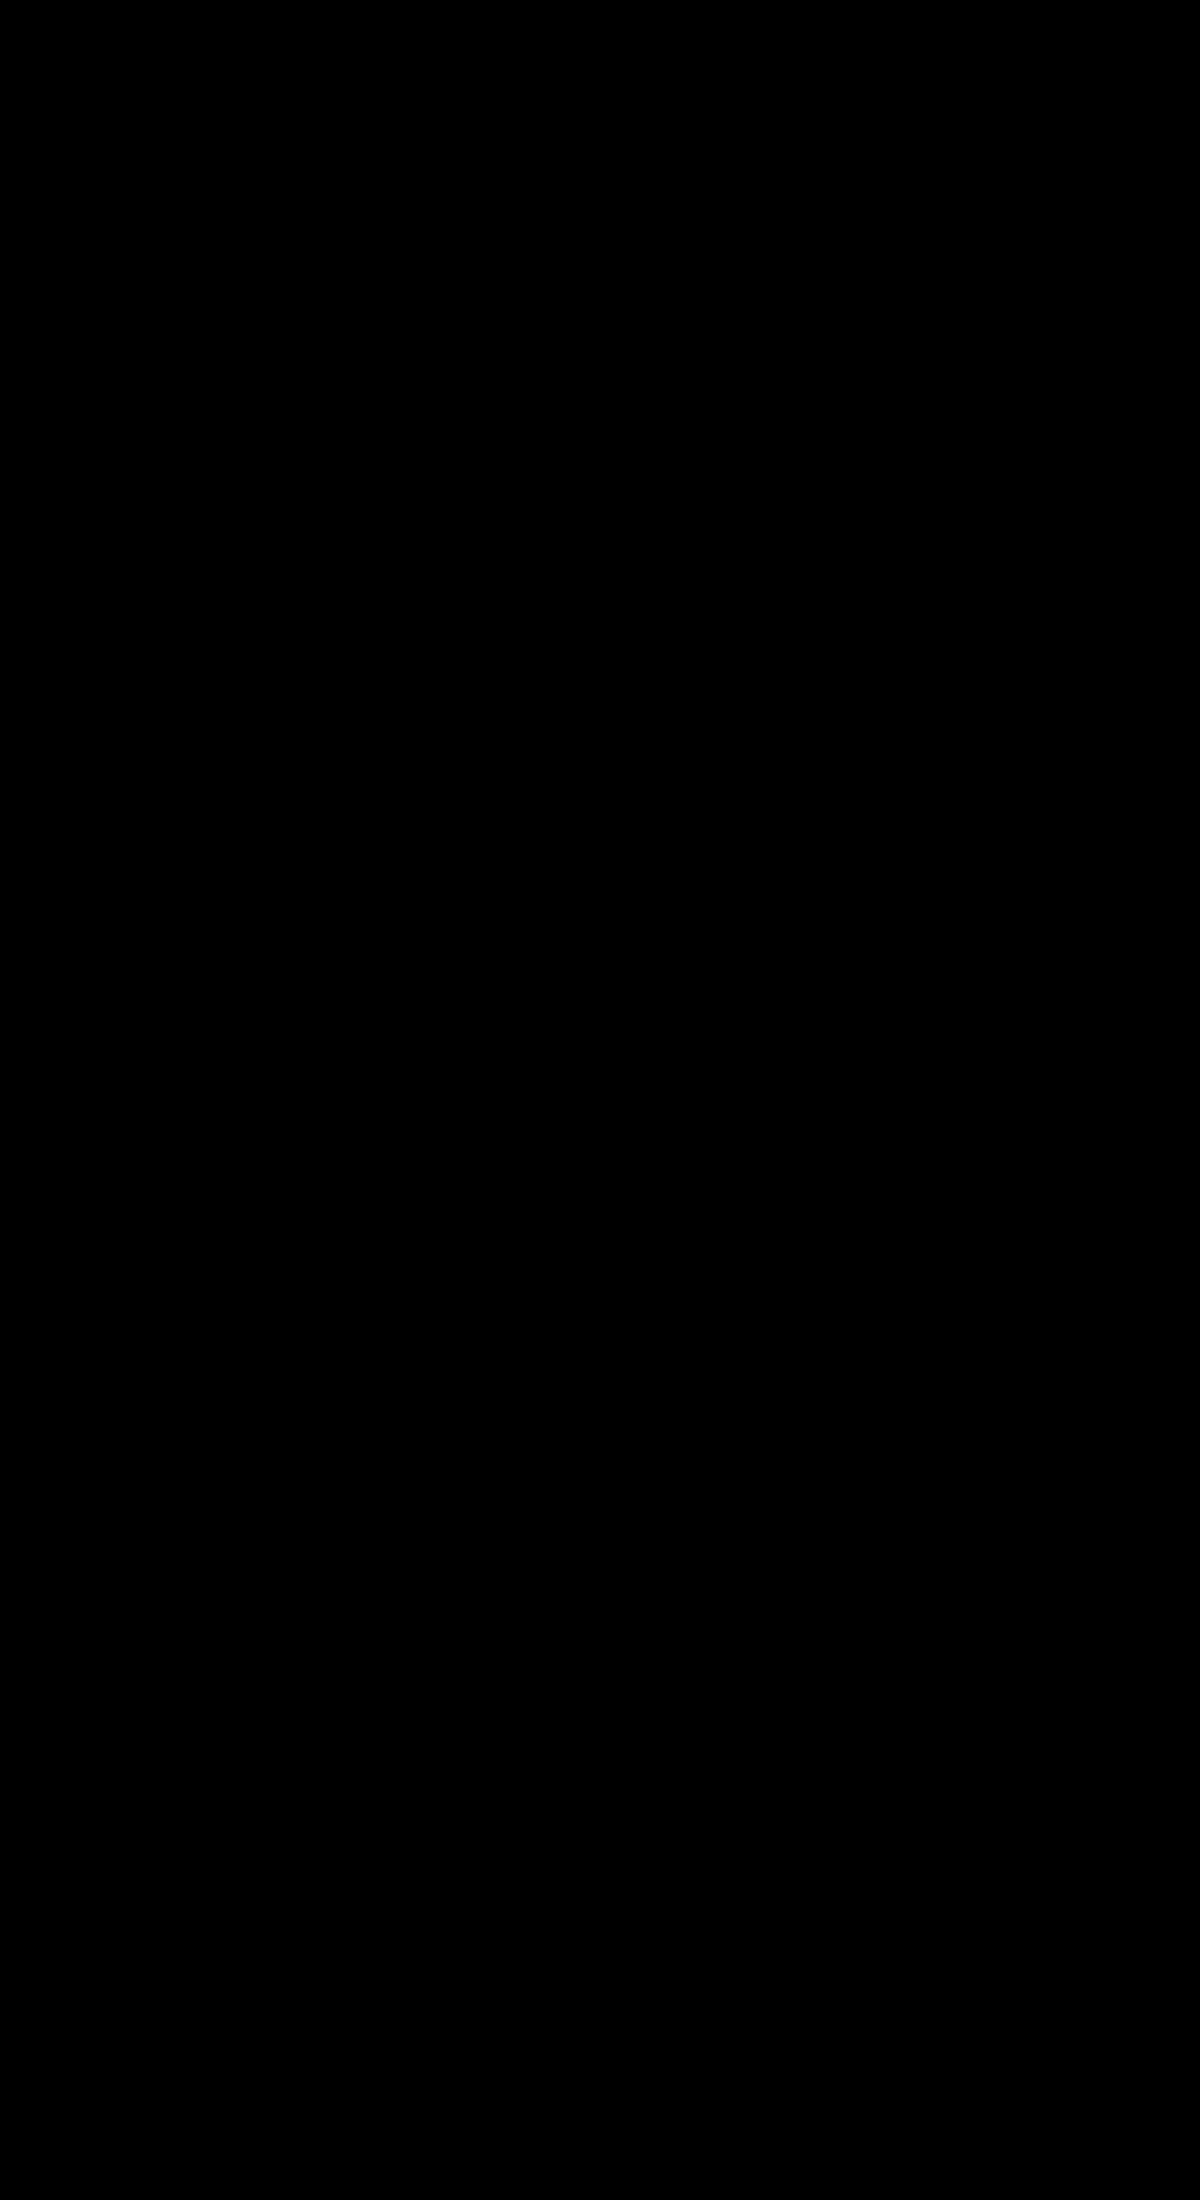

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

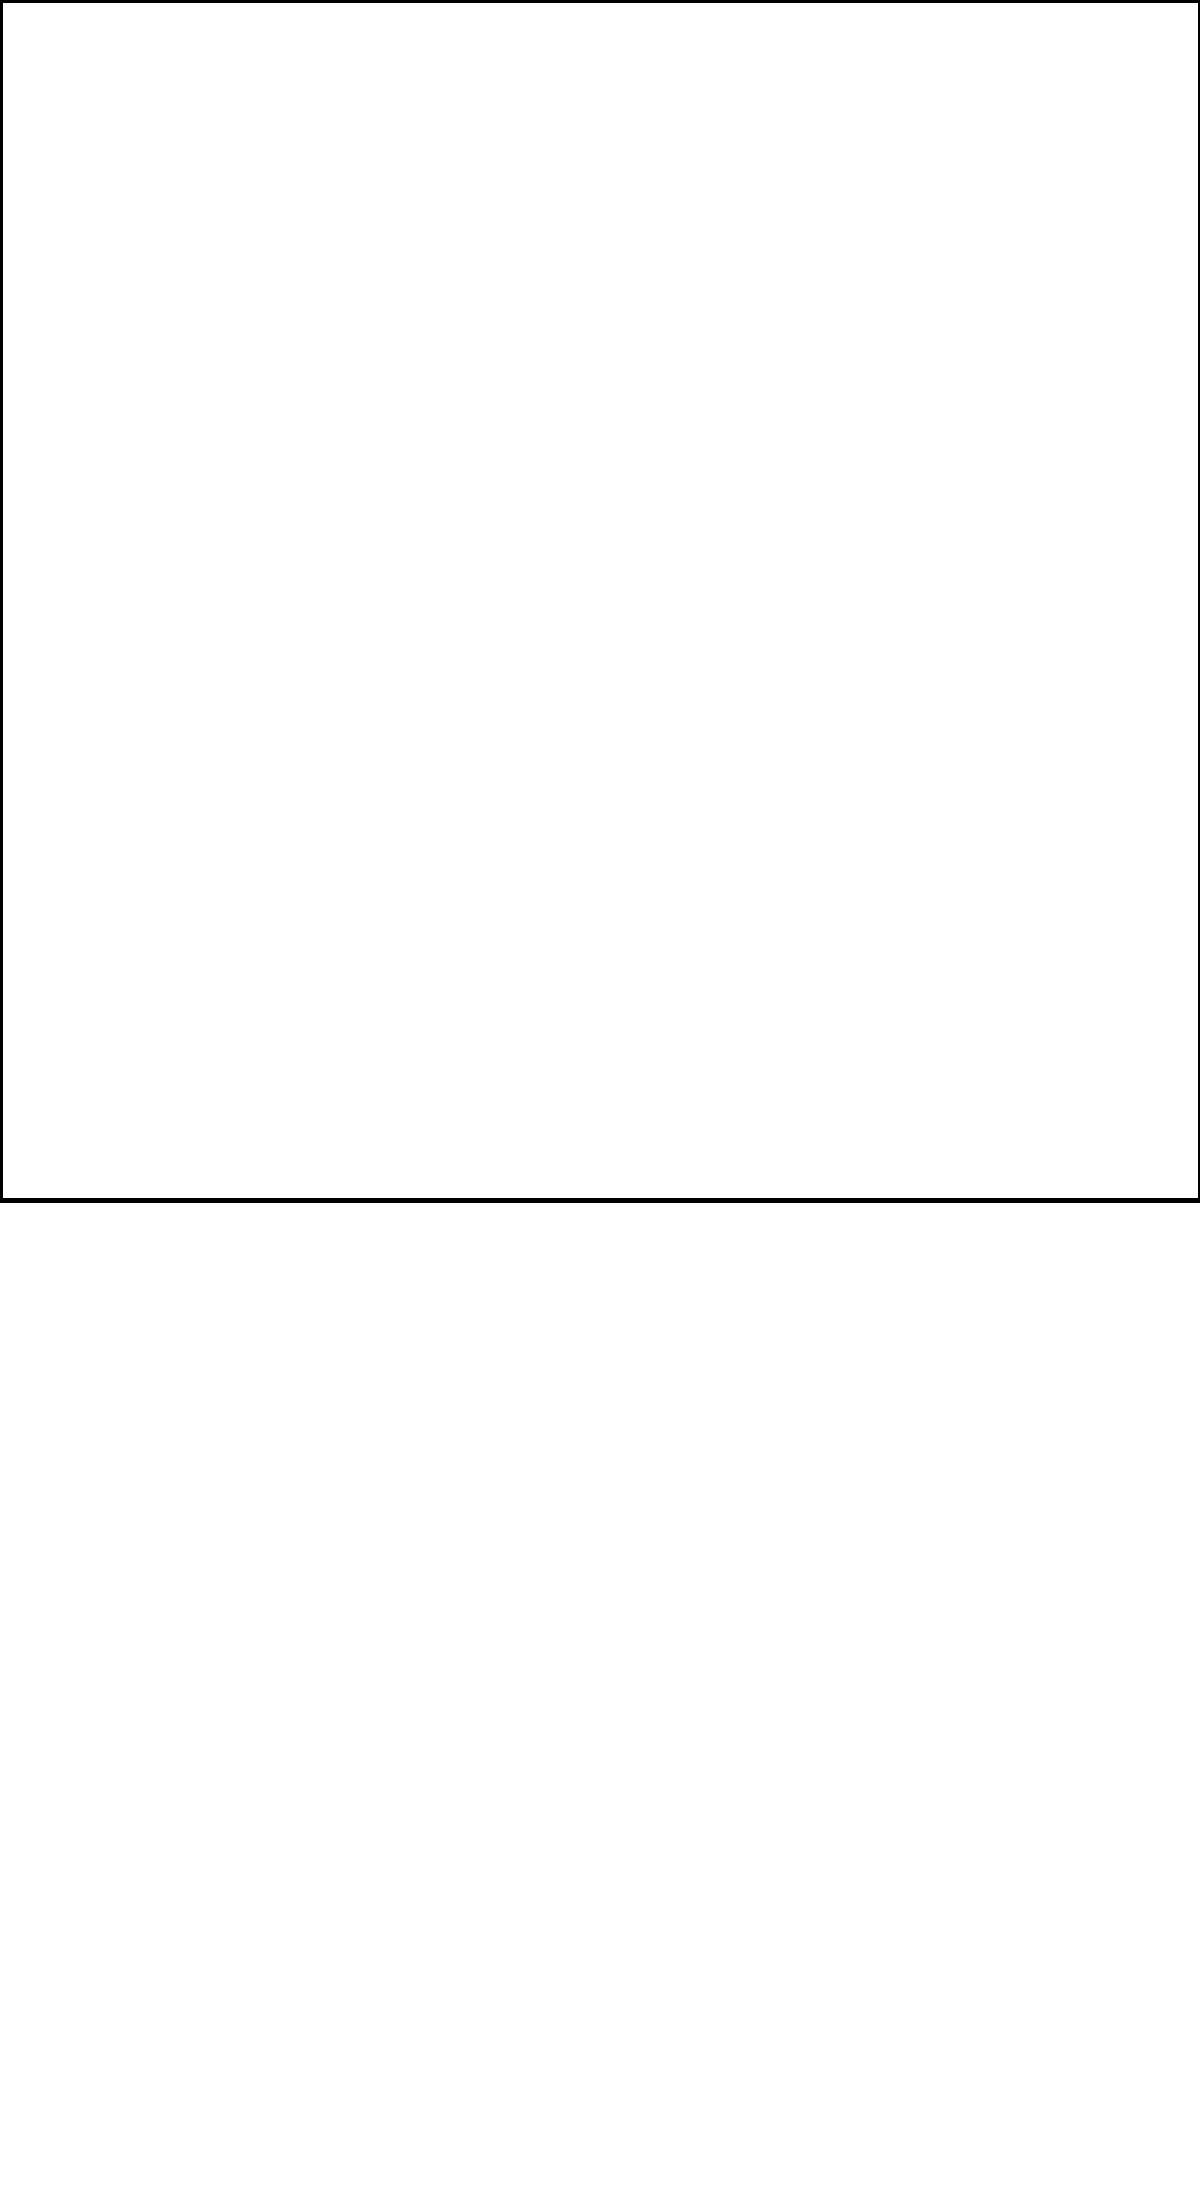

In [ ]:
import cv2  # python-opencv
import numpy as np
from google.colab.patches import cv2_imshow
# img = np.zeros((2200,1200,3), dtype=np.uint8)
# img*=255
width, height = 1200, 2200
line_thickness = 3

#top
x1, y1 = 0, 0
x2, y2 = 1200, 0
image = np.ones((height, width,3)) * 255
new = cv2.line(image, (x1, y1), (x2, y2), (0, 0, 0), thickness=line_thickness)

#bottom
x1, y1 = 0, 1200
x2, y2 = 1200, 1200
new = cv2.line(new, (x1, y1), (x2, y2), (0, 0, 0), thickness=line_thickness)

#left
x1, y1 = 0, 0
x2, y2 = 0, 1200
new = cv2.line(new, (x1, y1), (x2, y2), (0,0, 0), thickness=line_thickness)

#right
x1, y1 = 1200, 0
x2, y2 = 1200, 1200
new = cv2.line(new, (x1, y1), (x2, y2), (0,0, 0), thickness=line_thickness)

cv2_imshow(new)

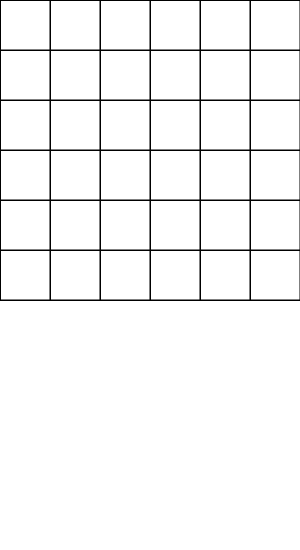

In [ ]:
line_thickness = 3
for i in range(0,7):
  x1, y1 = 0, i*200
  x2, y2 = 1200, i*200
  new = cv2.line(new, (x1, y1), (x2, y2), (0, 0, 0), thickness=line_thickness)

for i in range(0,7):
  x1, y1 = i*200, 0
  x2, y2 = i*200, 1200
  new = cv2.line(new, (x1, y1), (x2, y2), (0, 0, 0), thickness=line_thickness)

re = cv2.resize(new, (300, 550))
cv2_imshow(re)

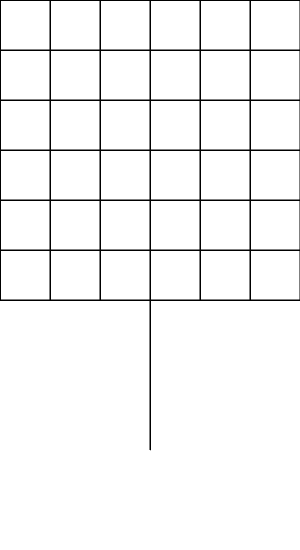

In [ ]:
x1, y1 = 3*200, 1200
x2, y2 = 3*200, 1800
new = cv2.line(new, (x1, y1), (x2, y2), (0, 0, 0), thickness=line_thickness)

re = cv2.resize(new, (300, 550))
cv2_imshow(re)

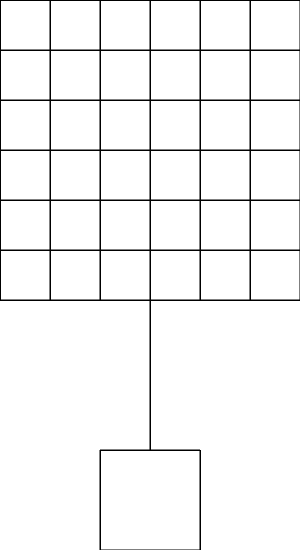

In [ ]:
# Start coordinate, here (5, 5)
# represents the top left corner of rectangle
start_point = (400, 1800)
  
# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (800, 2200)
  
# Blue color in BGR
color = (0, 0, 0)
  
# Line thickness of 2 px
thickness = 3
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
iii = cv2.rectangle(new, start_point, end_point, color, thickness)
  
# Displaying the image 
re = cv2.resize(iii, (300, 550))
cv2_imshow(re)

In [ ]:
# [(0, 3), (5, 0), (0, 2), (3, 1), (2, 3)]
# [1, 2, 2, 3, 3]

# Pymoo

In [ ]:
pip install -U pymoo

     |████████████████████████████████| 2.5 MB 25.7 MB/s 
     |████████████████████████████████| 239 kB 40.3 MB/s 


In [ ]:
from pymoo.algorithms.soo.nonconvex.brkga import BRKGA
import numpy as np
from pymoo.core.problem import ElementwiseProblem
import math

class RobotProblem(ElementwiseProblem):
    
    def __init__(self, random_state, a=0.5):
        np.random.seed(random_state)
        # cx = np.random.randint(0, 6, 5)
        # cy = np.random.randint(0, 6, 5)
        # self.levels = [1, 2, 2, 3, 3]
        # np.random.shuffle(self.levels)
        cx = [4,0,0,2,5]
        cy = [0,5,4,2,4]
        self.levels = [1,1,2,2,3]
        self.locations = [(60, 200)]
        self.cells = []
        self.DM = []
        self.a = a
        for i in range(5):
            self.locations.append( (cx[i]*20+10, 120 - cy[i]*20+10) )
            self.cells.append( (cx[i], cy[i]) )


        for i in range(6):
            D = []
            for j in range(6):
                dx = self.locations[i][0] -  self.locations[j][0]
                dy = self.locations[i][1] -  self.locations[j][1]
                D.append(math.sqrt(dx*dx + dy*dy))

            self.DM.append(D)
        self.levels.insert(0,0)
        self.levels = np.array(self.levels)
        self.factor = np.array([5, 4, 3, 2, 1])
        xy = np.array(self.locations)
        self.x = xy[:, 0]
        self.y = 200-xy[:, 1]
        self.y2 = xy[:, 1]


        super().__init__(n_var=5, n_obj=1, n_constr=0, xl=0, xu=1)

    def __str__(self):
        toReturn = "Cells:" +str(self.cells)
        toReturn += "\nLocations:\tID\tX\tY\tLevel" 
        for i in range(6):
            level = '-'
            if self.levels[i] != 0:
                level = str(self.levels[i])
            toReturn +="\n\t\t " + str(i) + "\t"+str(self.locations[i][0]) + "\t"+str(self.locations[i][1])+"\t"+level
        return toReturn

    def total_distance(self, route):
        total_dis = 0
        for i in range(1, len(route)):
            ci = route[i-1]
            cj = route[i]
            total_dis += self.DM[ci][cj]
        return total_dis


    def _evaluate(self, x, out, *args, **kwargs):
        ids = np.argsort(x)+1
        route = list(ids)
        route.insert(0, 0)
        route.append(0)
        dis = self.total_distance(route)

        level = np.sum(self.levels[ids]*self.factor)/(15)
        out["hash"] = hash(str(ids))
        out["F"] = self.a*dis/500 + (1-self.a)/level
        out["pheno"] = {"total dis": dis, "total level":level, "route":route, "level":self.levels[ids]}




        """hindex = np.argsort(x[self.N1:self.N1+self.N2]) + self.N1
        tindex = np.argsort(x[self.N1+self.N2:]) + (self.N1+self.N2)
        routes = self.create_routes(hindex, tindex)

        N = np.sum(self.data_dict['Group'])
        #print(routes)
        routes = self.limit_cost(routes, self.data_dict['Max Cost'], N)


        total_dis = self.total_distance(routes)
        search_cates = self.satification_cate(self.data_dict['Turiusm Categories'], routes)
        place_sat =  self.satification_group(self.data_dict['Group'], routes)
        total_hotel_cost =  self.hotel_cost( routes) 
        #print(np.sum(place_sat), place_sat, type(np.sum(place_sat)*10))
        
        cost_person = total_hotel_cost + total_dis*self.data_dict['Enegry Cost']/N
        satification = self.b*search_cates + self.c*float(np.sum(place_sat))/N

        out["F"] = self.a*cost_person - satification
        #print(out["F"], type(np.sum(place_sat)))
        out["pheno"] = {'category satification':search_cates, "total distance":total_dis , 'member count': N,
                        'hotel cost': total_hotel_cost, 'person cost':cost_person, 'total satification':satification,
                        'place satification':place_sat , 'route':routes, "hotel":hindex, 'travel place':tindex}
        out["hash"] = hash(str(x))"""


        
#print(len(res.X),res.opt.get("pheno")[0])

def visualize(problem, x, route, fig=None, ax=None, show=True, label=True):
    with plt.style.context('ggplot'):

        if fig is None or ax is None:
            fig, ax = plt.subplots(figsize=(10,15))

        index1 = np.where(problem.levels==1)[0]
        index2 = np.where(problem.levels==2)[0]
        index3 = np.where(problem.levels==3)[0]

        # plot cities using scatter plot
        ax.scatter(problem.x, problem.y, s=250, color='blue')
        ax.scatter(problem.x[index1], problem.y[index1], s=250, color='green')
        ax.scatter(problem.x[index2], problem.y[index2], s=250, color='orange')
        ax.scatter(problem.x[index3], problem.y[index3], s=250, color='red')
        if label:
            # annotate cities
            for i, c in enumerate(problem.x):
                ax.annotate(str(i), xy=(problem.x[i], problem.y[i]), fontsize=10, ha="center", va="center", color="white")
        print(problem.x)
        # plot the line on the path
        r = route
        for i in range(len(r)):
            current = r[i]
            next_ = r[(i + 1) % len(r)]
            #print(current, next_)
            p1 = (problem.x[current], problem.x[next_])
            p2= (problem.y[current], problem.y[next_])
            ax.plot(p1, p2, 'r--')

        fig.suptitle("Route length: %.4f" % len(x))

        if show:
            fig.show()





n_gen |  n_eval |     fopt     |     favg    
    1 |      80 |  0.961911555 |  1.213013279
    2 |     140 |  0.895244773 |  1.136345180
    3 |     200 |  0.895244773 |  1.112356448
    4 |     260 |  0.895244773 |  1.106030332
    5 |     320 |  0.895244773 |  1.088244671
    6 |     380 |  0.895244773 |  1.090787936
    7 |     440 |  0.895244773 |  1.049474603
    8 |     500 |  0.895244773 |  1.065800168
    9 |     560 |  0.895244773 |  1.092042877
   10 |     620 |  0.895244773 |  1.032872816
Best solution found: 
X = [0.52761877 0.40909083 0.26889202 0.07201204 0.41813613]
F = [0.89524477]
Solution [array({'total dis': 447.62238650964446, 'total level': 1.8666666666666667, 'route': [0, 4, 3, 2, 5, 1, 0], 'level': array([2, 2, 1, 3, 1])},
       dtype=object)                                                                                                                         ]

[ 60  90  10  10  50 110]


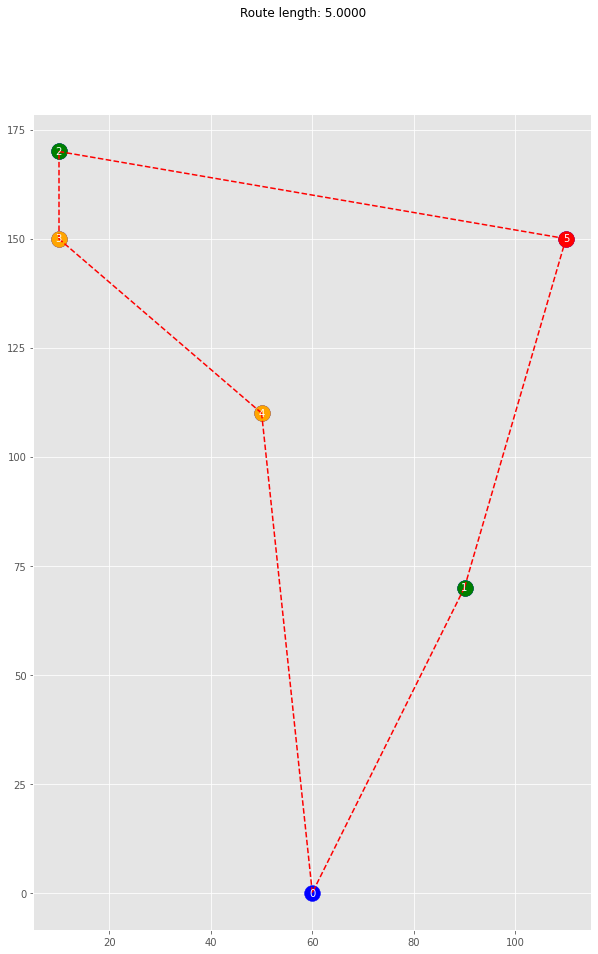

In [ ]:
from numpy.lib.function_base import rot90
from pymoo.algorithms.soo.nonconvex.brkga import BRKGA
from pymoo.optimize import minimize
import matplotlib.pyplot as plt

case=2
robotProblem = RobotProblem(case, a=1)

# print(robotProblem)
# robotProblem.DM
factor = 1

algorithm = BRKGA(
    n_elites=20,
    n_offsprings=40,
    n_mutants=20,
    bias=0.7,
    #eliminate_duplicates=MyElementwiseDuplicateElimination()
    )

res = minimize(robotProblem,
            algorithm,
            ("n_gen", 10),
                seed=1,
                #display=MyDisplay(),
                verbose=True)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))
print("Solution", res.opt.get("pheno")[0])
print()
visualize(robotProblem, res.X, res.opt.get("pheno")[0][0].tolist()['route'])

In [ ]:
robotProblem.cells, robotProblem.levels

([(4, 0), (0, 5), (0, 4), (2, 2), (5, 4)], array([0, 1, 1, 2, 2, 3]))

In [ ]:
import matplotlib.pyplot as plt

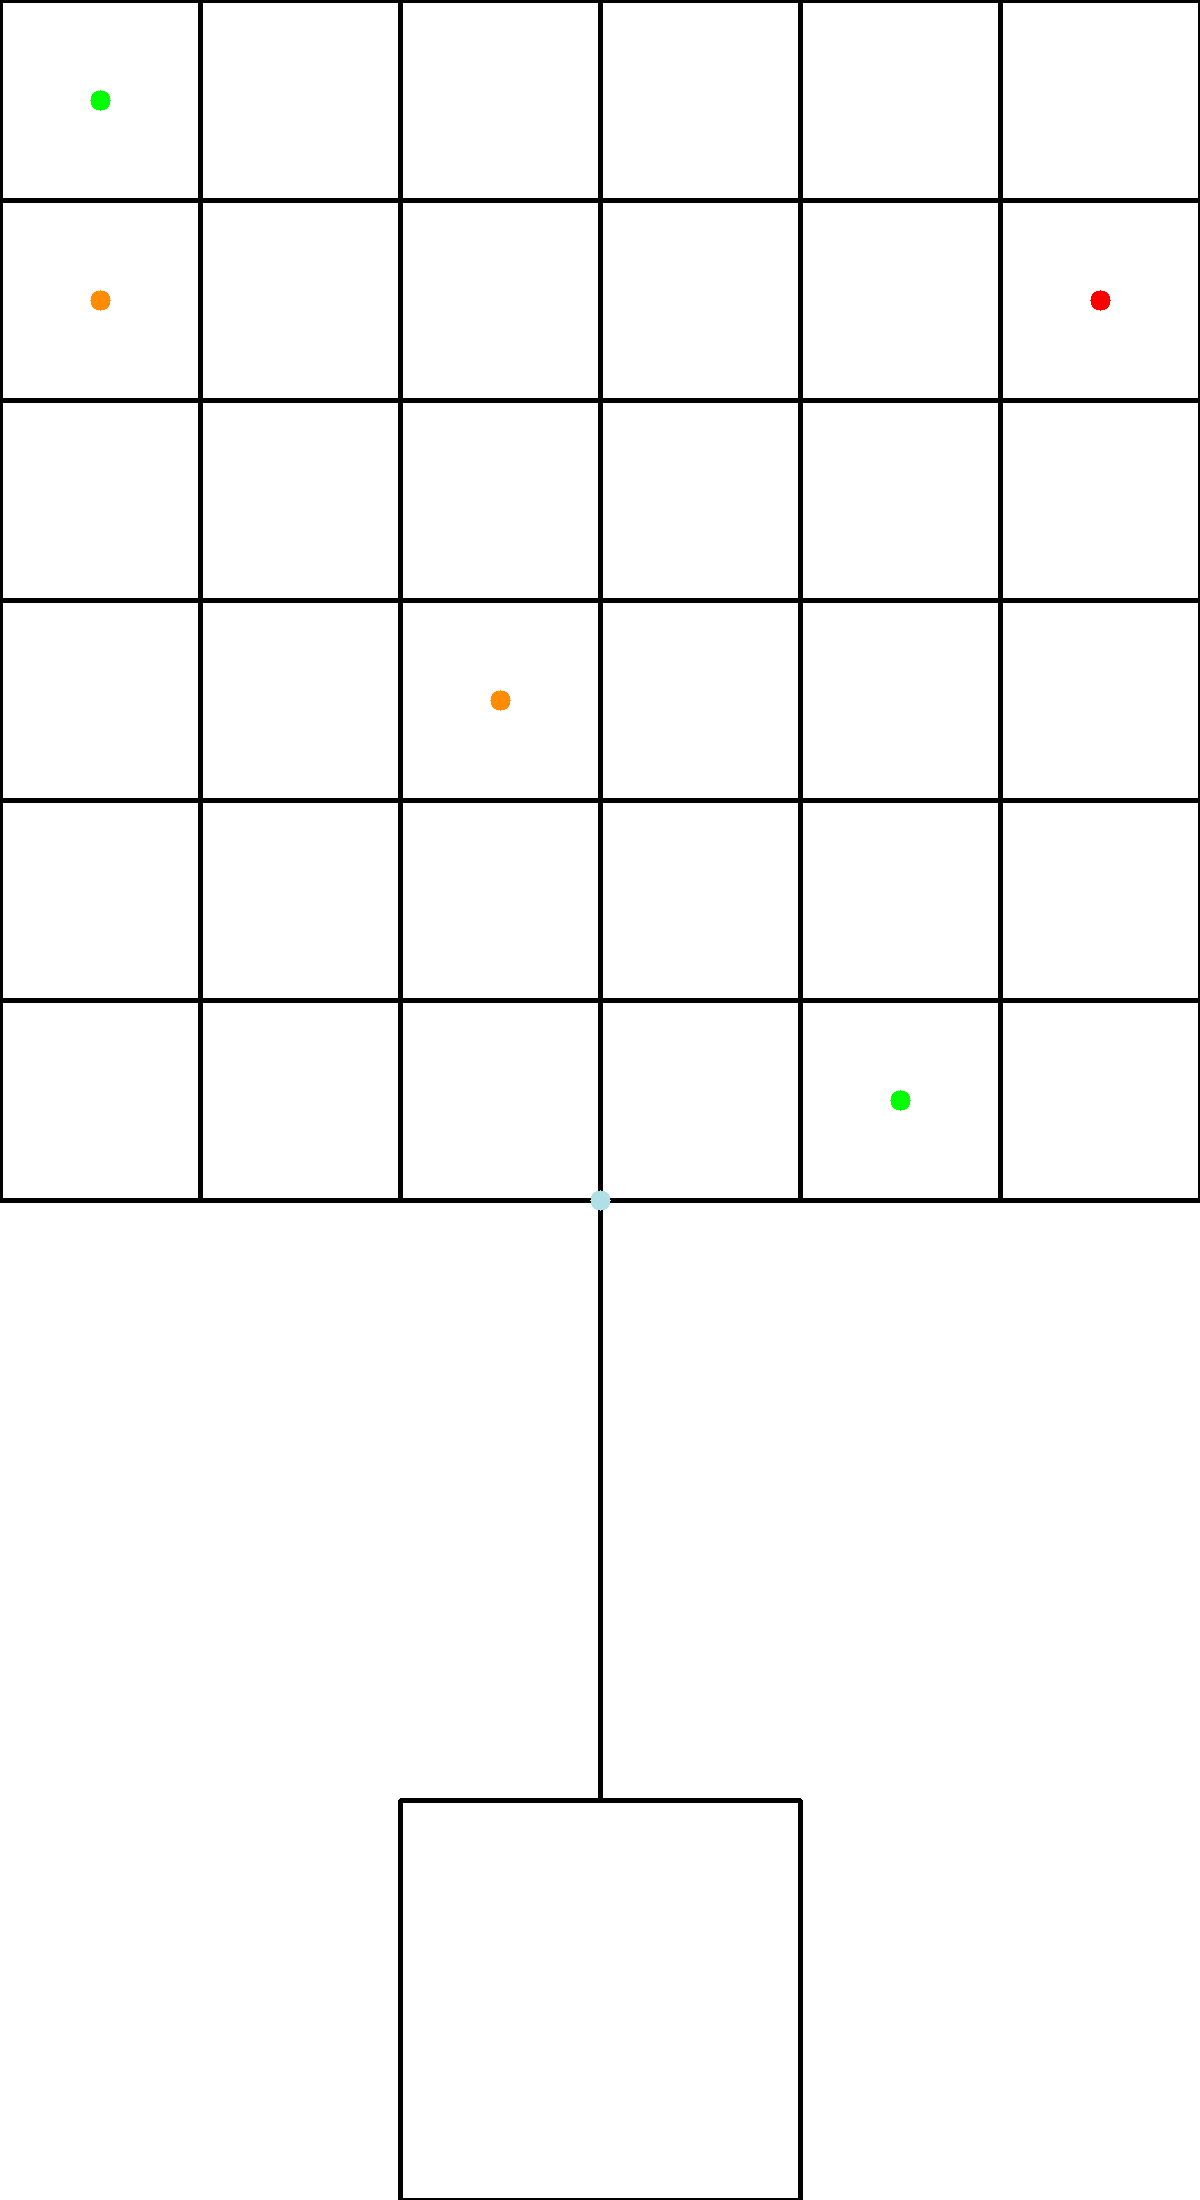

In [ ]:
#iii
import cv2
x = robotProblem.cells[0][0]*200
y = robotProblem.cells[0][1]*200
dott = cv2.circle(iii, (x+100,1200 - y-100), radius=10, color=(255, 0, 0), thickness=-1)

for i in range(0,5):
  x = robotProblem.cells[i][0]*200
  y = robotProblem.cells[i][1]*200
  if robotProblem.levels[i+1] == 0:
    c = (255,0,0)
  elif robotProblem.levels[i+1] == 1:
    c = (0,255,0)
  elif robotProblem.levels[i+1] == 2:
    c = (0,140,255)
  elif robotProblem.levels[i+1] == 3:
    c = (0,0,255)
  dott = cv2.circle(dott, (x+100,1200 - y-100), radius=10, color=c, thickness=-1)


cv2_imshow(dott)

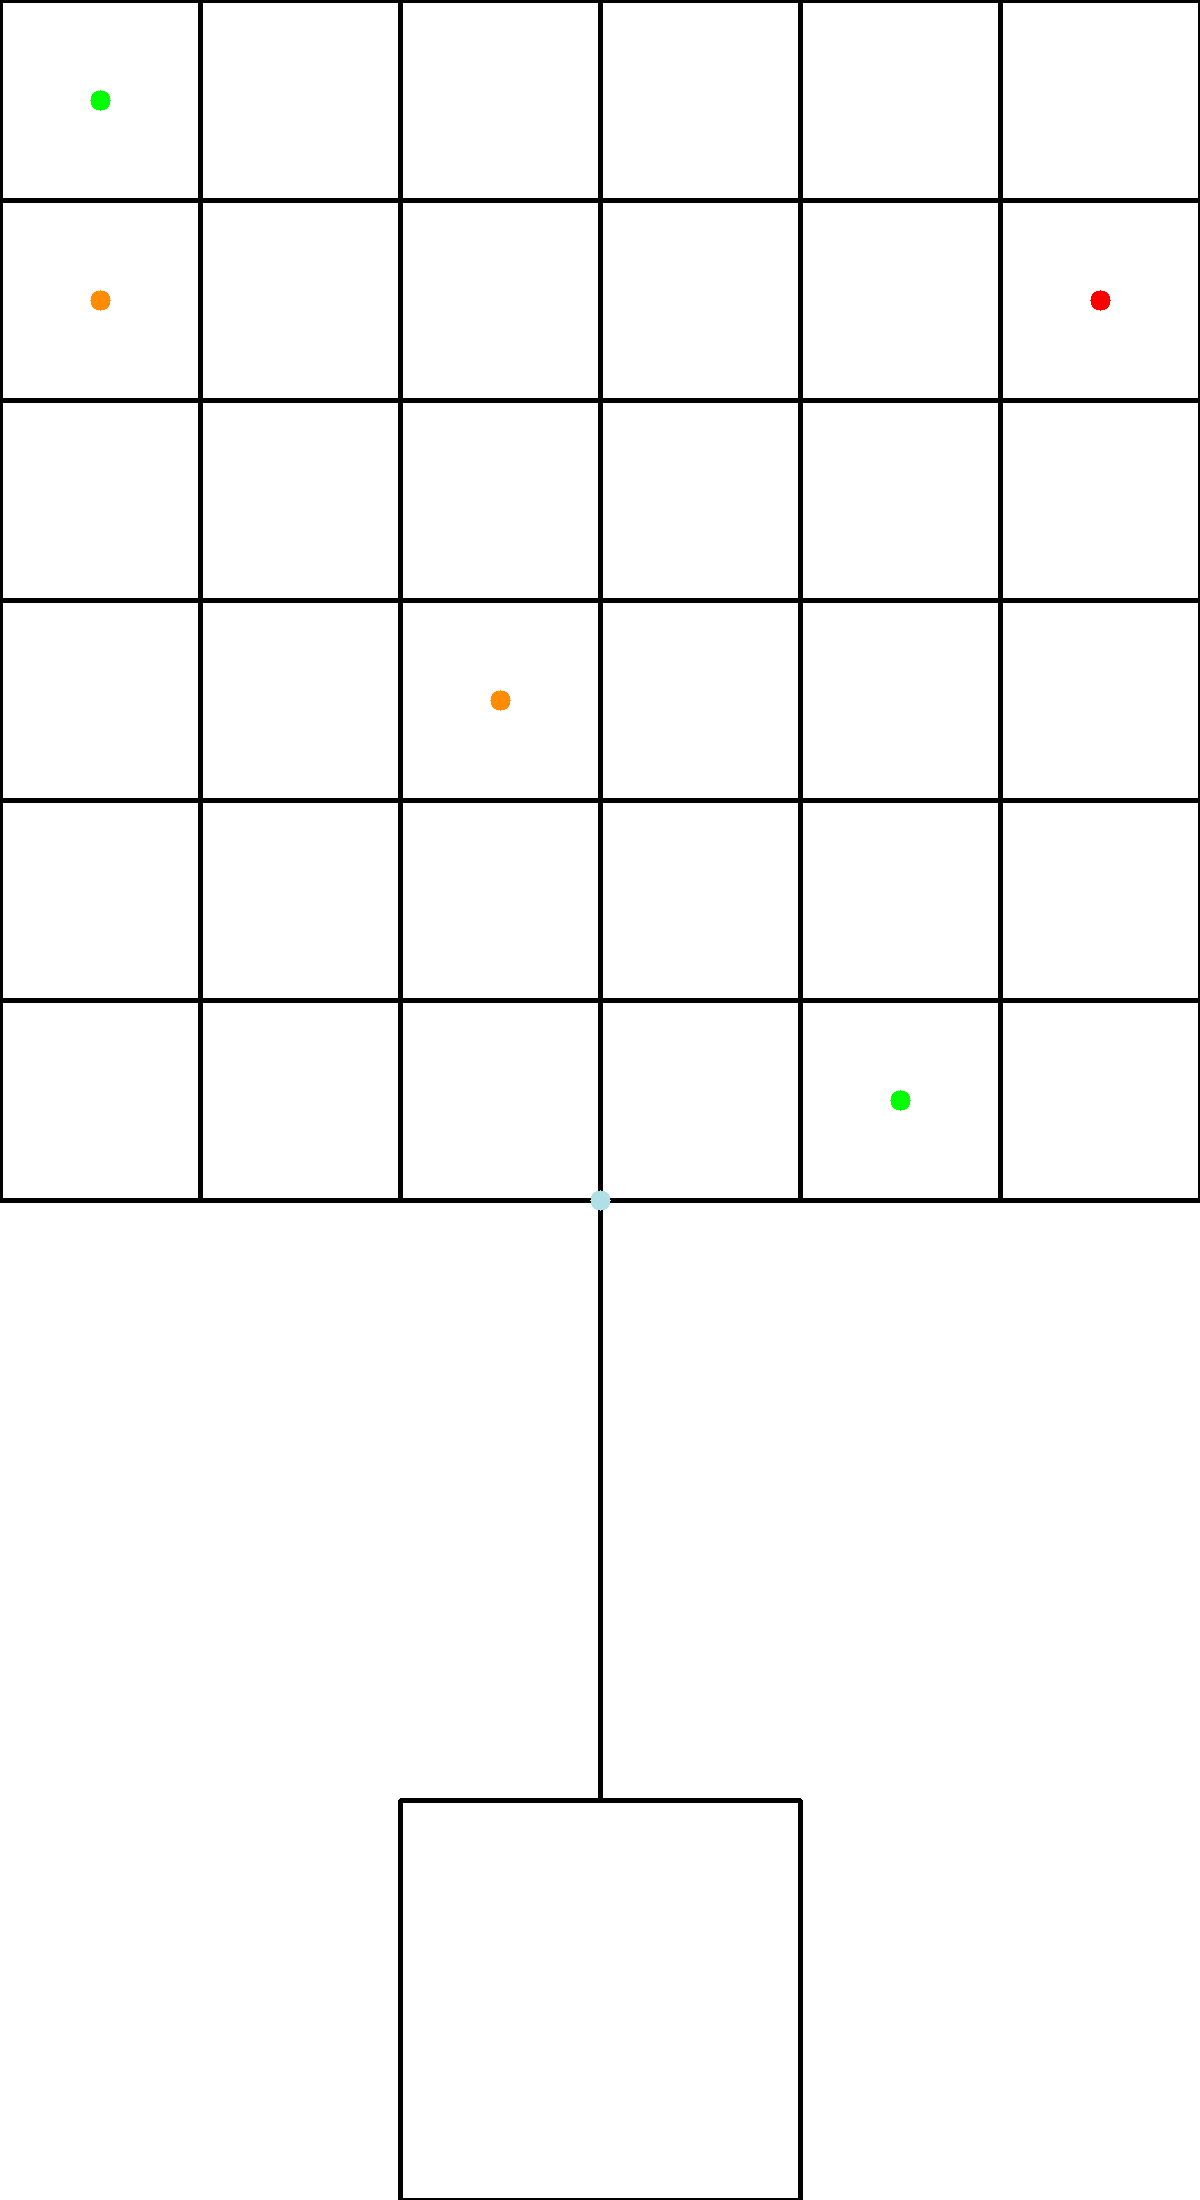

In [ ]:
# x2, y2 = 3*200, 1800
# [(0, 3), (5, 0), (0, 2), (3, 1), (2, 3)]
x = 3*200
y = 1200
dott = cv2.circle(dott, (x,y), radius=10, color=(230,224,176), thickness=-1)
cv2_imshow(dott)

In [ ]:
spare_dott = dott.copy()

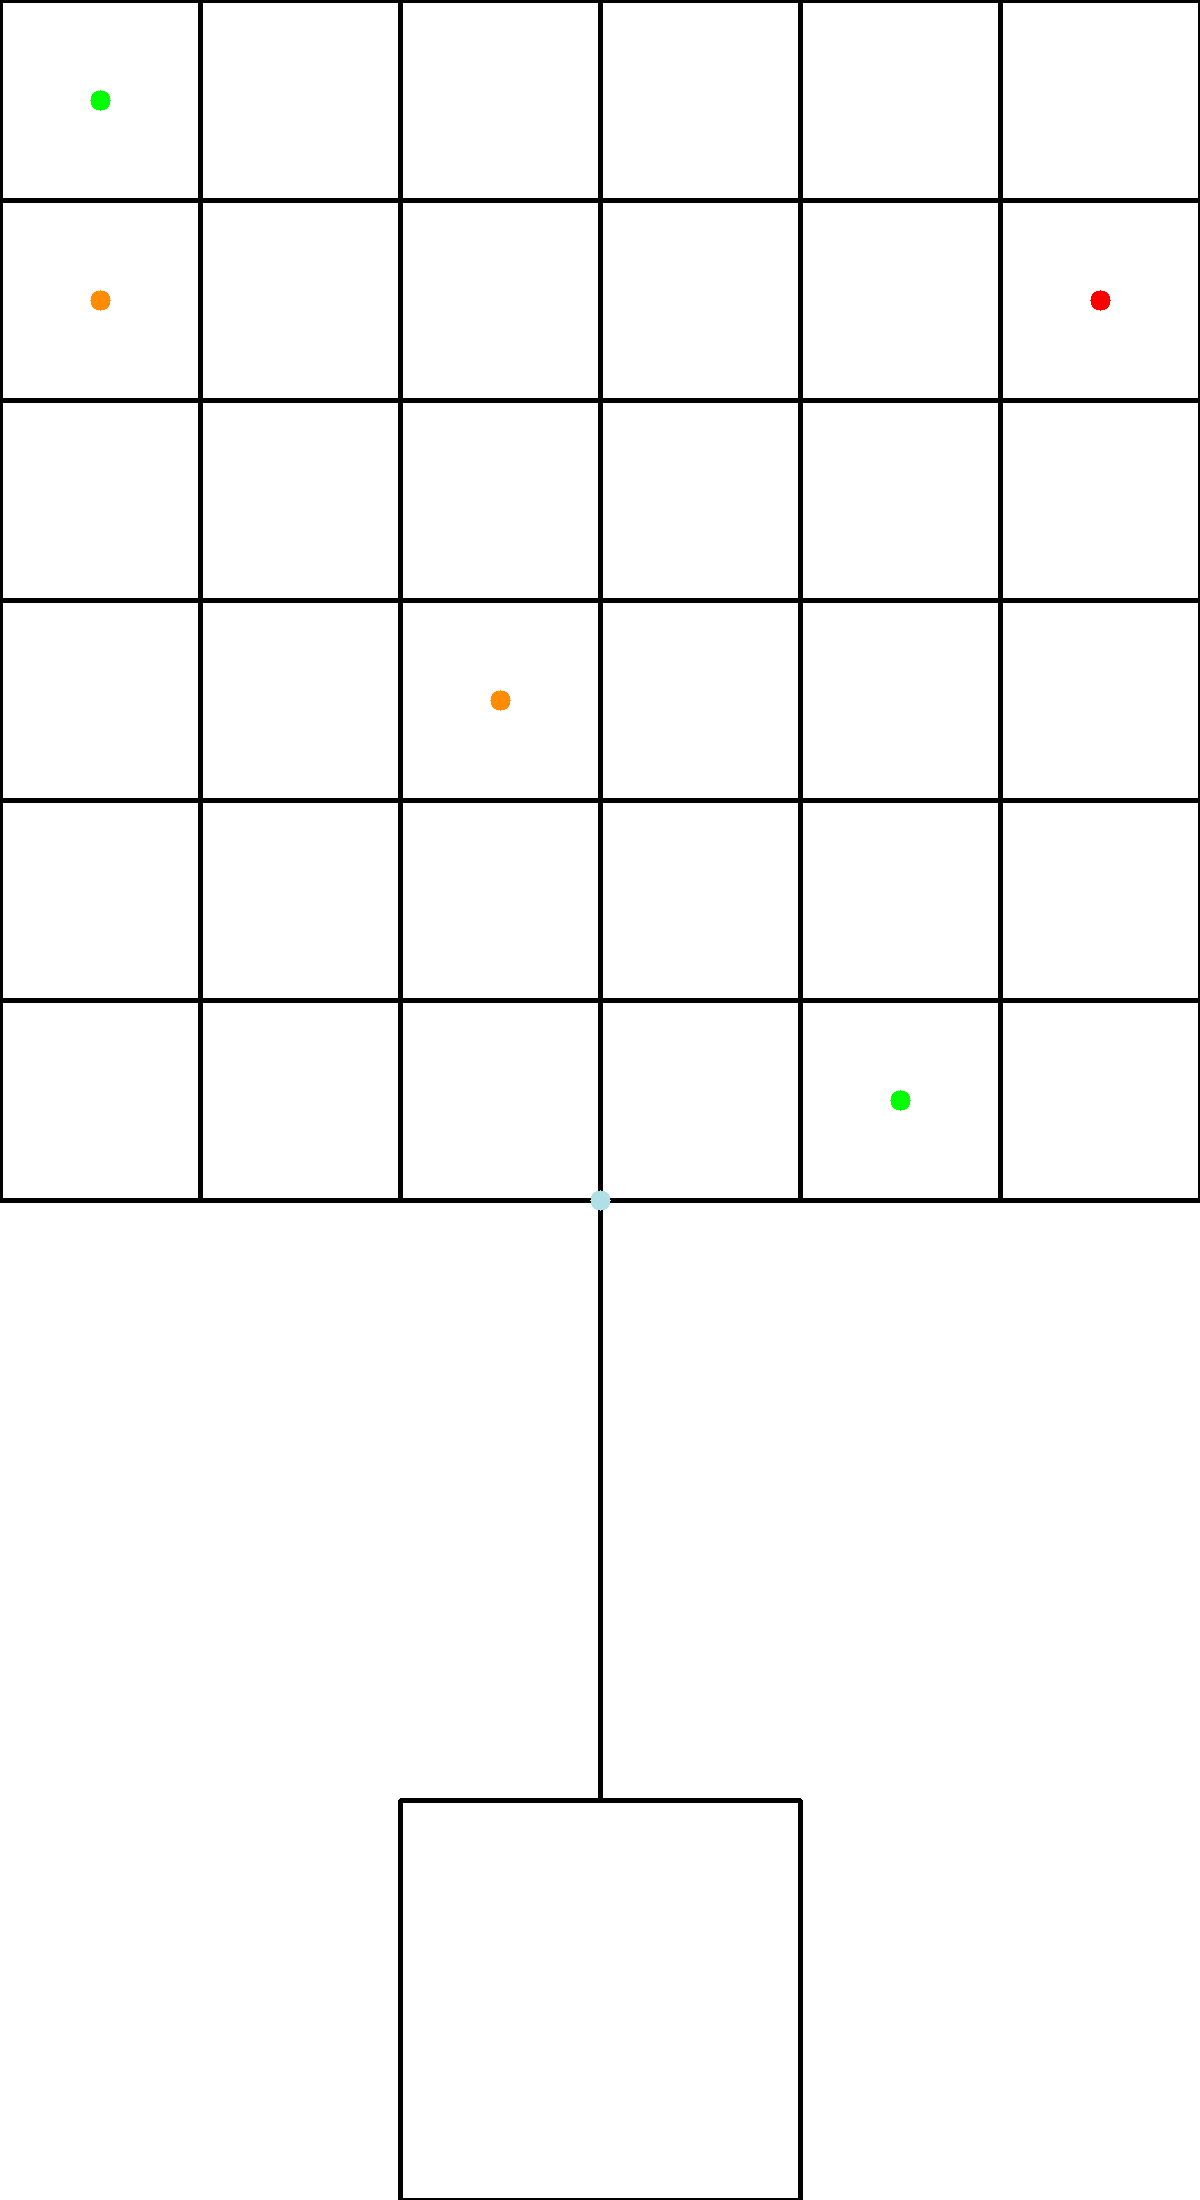

In [ ]:
cv2_imshow(dott)

In [ ]:
robotProblem.cells, robotProblem.levels

([(4, 0), (0, 5), (0, 4), (2, 2), (5, 4)], array([0, 1, 1, 2, 2, 3]))

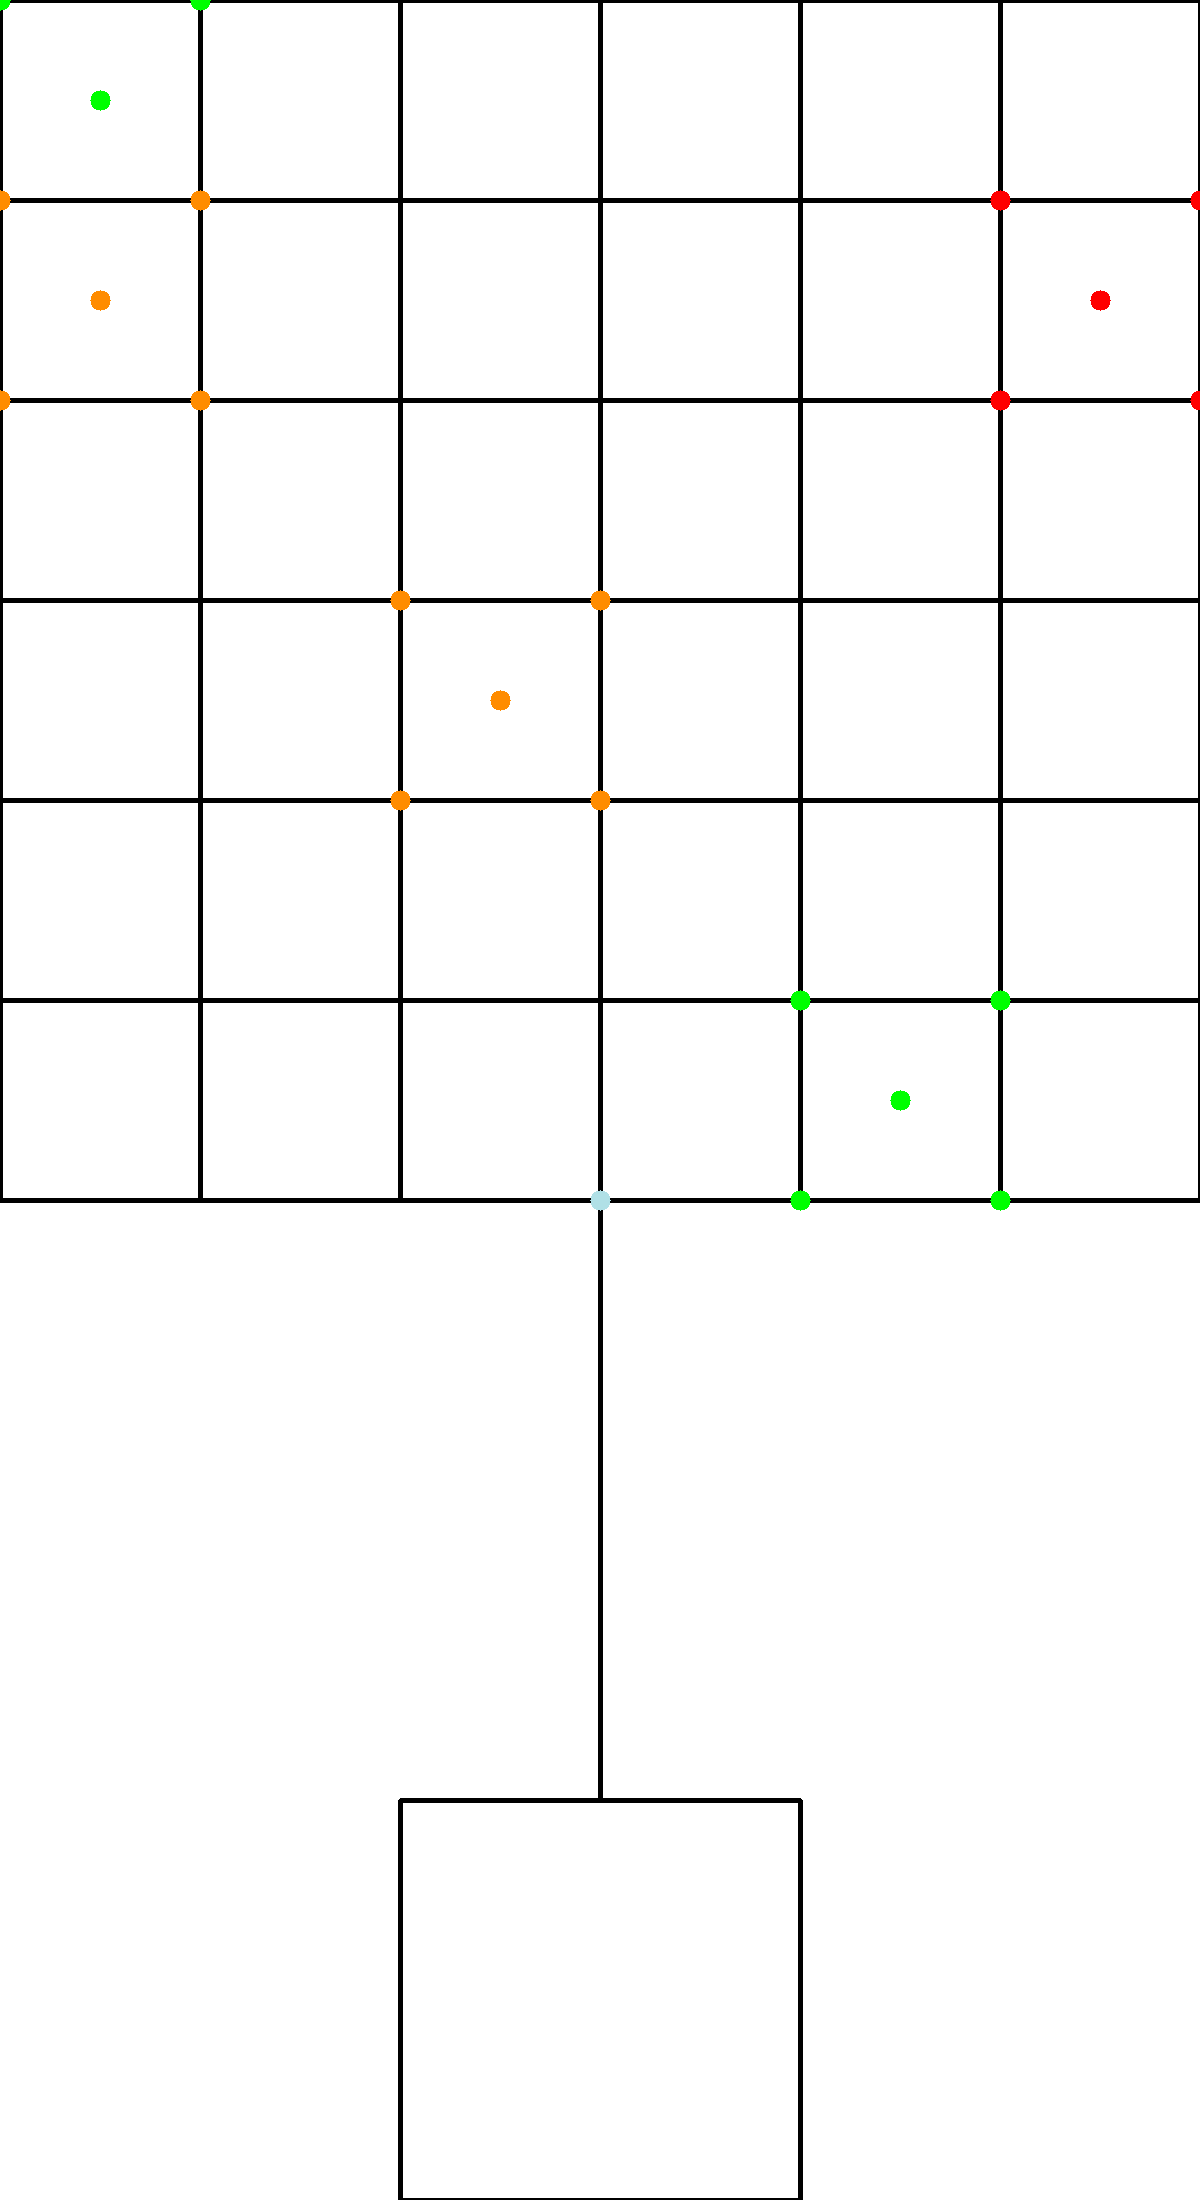

In [ ]:
#iii
x = robotProblem.cells[0][0]*200
y = robotProblem.cells[0][1]*200
dott = cv2.circle(iii, (x+100,1200 - y-100), radius=10, color=(255, 0, 0), thickness=-1)
candidates = {}

for i in range(0,5):
  x = robotProblem.cells[i][0]*200
  y = robotProblem.cells[i][1]*200
  if robotProblem.levels[i+1] == 0:
    c = (255,0,0)
  elif robotProblem.levels[i+1] == 1:
    c = (0,255,0)
  elif robotProblem.levels[i+1] == 2:
    c = (0,140,255)
  elif robotProblem.levels[i+1] == 3:
    c = (0,0,255)

  can = []
  #plot 4 candidate 
  can.append((x, 1200-y))
  can.append((x, 1200-y-200))
  can.append((x+200, 1200-y))
  can.append((x+200, 1200-y-200))

  for m in can:
    spare_dott = cv2.circle(spare_dott, (m[0],m[1]), radius=10, color=c, thickness=-1)
  candidates[i+1] = can


cv2_imshow(spare_dott)

In [ ]:
candidates[0] = [(3*200, 1200)]
candidates, robotProblem.cells, robotProblem.levels

({0: [(600, 1200)],
  1: [(800, 1200), (800, 1000), (1000, 1200), (1000, 1000)],
  2: [(0, 200), (0, 0), (200, 200), (200, 0)],
  3: [(0, 400), (0, 200), (200, 400), (200, 200)],
  4: [(400, 800), (400, 600), (600, 800), (600, 600)],
  5: [(1000, 400), (1000, 200), (1200, 400), (1200, 200)]},
 [(4, 0), (0, 5), (0, 4), (2, 2), (5, 4)],
 array([0, 1, 1, 2, 2, 3]))

In [ ]:
order = res.opt.get("pheno")[0][0].tolist()['route']
order

[0, 4, 3, 2, 5, 1, 0]

In [ ]:
co_info = {}
for i, o in enumerate(order[:-1]):
  print('o'+str(o))
  co_xy = []
  for i in range (0, len(candidates[o])-1):
    x1, y1 = candidates[o][i]
    # print(i)
    for next in range(i+1, len(candidates[o])):
      x2, y2 = candidates[o][next]
      # print(x2,y2)
      x = (x1, x2)
      y = (y1, y2)
      _xy = [x,y]
      co_xy.append(_xy)
  co_info[o] = co_xy
co_info    

o0
o4
o3
o2
o5
o1


{0: [],
 1: [[(800, 800), (1200, 1000)],
  [(800, 1000), (1200, 1200)],
  [(800, 1000), (1200, 1000)],
  [(800, 1000), (1000, 1200)],
  [(800, 1000), (1000, 1000)],
  [(1000, 1000), (1200, 1000)]],
 2: [[(0, 0), (200, 0)],
  [(0, 200), (200, 200)],
  [(0, 200), (200, 0)],
  [(0, 200), (0, 200)],
  [(0, 200), (0, 0)],
  [(200, 200), (200, 0)]],
 3: [[(0, 0), (400, 200)],
  [(0, 200), (400, 400)],
  [(0, 200), (400, 200)],
  [(0, 200), (200, 400)],
  [(0, 200), (200, 200)],
  [(200, 200), (400, 200)]],
 4: [[(400, 400), (800, 600)],
  [(400, 600), (800, 800)],
  [(400, 600), (800, 600)],
  [(400, 600), (600, 800)],
  [(400, 600), (600, 600)],
  [(600, 600), (800, 600)]],
 5: [[(1000, 1000), (400, 200)],
  [(1000, 1200), (400, 400)],
  [(1000, 1200), (400, 200)],
  [(1000, 1200), (200, 400)],
  [(1000, 1200), (200, 200)],
  [(1200, 1200), (400, 200)]]}

In [ ]:
co_info.values()

dict_values([[], [[(400, 400), (800, 600)], [(400, 600), (800, 800)], [(400, 600), (800, 600)], [(400, 600), (600, 800)], [(400, 600), (600, 600)], [(600, 600), (800, 600)]], [[(0, 0), (400, 200)], [(0, 200), (400, 400)], [(0, 200), (400, 200)], [(0, 200), (200, 400)], [(0, 200), (200, 200)], [(200, 200), (400, 200)]], [[(0, 0), (200, 0)], [(0, 200), (200, 200)], [(0, 200), (200, 0)], [(0, 200), (0, 200)], [(0, 200), (0, 0)], [(200, 200), (200, 0)]], [[(1000, 1000), (400, 200)], [(1000, 1200), (400, 400)], [(1000, 1200), (400, 200)], [(1000, 1200), (200, 400)], [(1000, 1200), (200, 200)], [(1200, 1200), (400, 200)]], [[(800, 800), (1200, 1000)], [(800, 1000), (1200, 1200)], [(800, 1000), (1200, 1000)], [(800, 1000), (1000, 1200)], [(800, 1000), (1000, 1000)], [(1000, 1000), (1200, 1000)]]])

In [ ]:
for i in co_info.values():
  for f,m in i:
    coooo_x, coooo_xx = f
    coooo_y, coooo_yy = m

In [ ]:
for i in co_info.values():
  for f,m in i:
    coooo_x, coooo_xx = f
    coooo_y, coooo_yy = m

In [ ]:
min(3,2)

2

In [ ]:
order

[0, 4, 3, 2, 5, 1, 0]

In [ ]:
import math
path = {}
for i, o in enumerate(order[:-1]):
  # print('number' + str(o) + ' to ' + str(order[i+1]))
  p = []
  for ocan_x, ocan_y in candidates[o]:
    for next_x, next_y in candidates[order[i+1]]:
      check = True
      #check whether they are crossed                   
      for border in co_info.values():
        for x_co,y_co in border:
          x1, x2 = x_co
          y1, y2 = y_co
          
          if (((min(ocan_x,next_x) < min(x1,x2) and max(ocan_x,next_x) > min(x1,x2)) or (min(ocan_x,next_x) < max(x1,x2) and max(ocan_x,next_x) > max(x1,x2))) and ((min(ocan_y,next_y) < min(y1,y2) and max(ocan_y,next_y) > min(y1,y2)) or (min(ocan_y,next_y) < max(y1,y2) and max(ocan_y,next_y) > max(y1,y2)))) :    
              check = False
              break 

          if (min(ocan_y, next_y) == min(y1,y2) and max(ocan_y, next_y) == max(y1,y2)) and (min(ocan_x, next_x) == min(x1,x2) and max(ocan_x, next_x) == max(x1,x2)) and (min(ocan_x,next_x) != max(ocan_x,next_x) and min(ocan_y,next_y) != max(ocan_y,next_y))  :
            check = False
            break

          # if (((min(ocan_x,next_x) < min(x1,x2) and max(ocan_x,next_x) > min(x1,x2)) or (min(ocan_x,next_x) < max(x1,x2) and max(ocan_x,next_x) > max(x1,x2))) and ((min(ocan_y,next_y) < min(y1,y2) and max(ocan_y,next_y) > min(y1,y2)) or (min(ocan_y,next_y) < max(y1,y2) and max(ocan_y,next_y) > max(y1,y2)))) :    
          #   check = False
          #   break 
          # if ((min(ocan_x,next_x) < min(x1,x2) and max(ocan_x,next_x) > min(x1,x2)) or (min(ocan_x,next_x) < max(x1,x2) and max(ocan_x,next_x) > max(x1,x2))) and (min(ocan_y, next_y) == min(y1,y2) and max(ocan_y, next_y) == max(y1,y2)):
          #   check = False
          #   break
          # if  (min(ocan_x, next_x) == min(x1,x2) and max(ocan_x, next_x) == max(x1,x2)) and ((min(ocan_y,next_y) < min(y1,y2) and max(ocan_y,next_y) > min(y1,y2)) or (min(ocan_y,next_y) < max(y1,y2) and max(ocan_y,next_y) > max(y1,y2))):
          #   check = False
          #   break
          # if (min(ocan_y, next_y) == min(y1,y2) and max(ocan_y, next_y) == max(y1,y2)) and (min(ocan_x, next_x) == min(x1,x2) and max(ocan_x, next_x) == max(x1,x2)):
          #   check = False
          #   break
          
        if not check:
          break
       
      if check:
        distance = math.sqrt(math.pow(ocan_x-next_x,2) + math.pow(ocan_y-next_y,2))
        p.append([(ocan_x,ocan_y),(next_x,next_y)])

  # print('###########################')
  path[o] = p
path

{0: [[(600, 1200), (400, 800)],
  [(600, 1200), (400, 600)],
  [(600, 1200), (600, 800)],
  [(600, 1200), (600, 600)]],
 1: [[(800, 1200), (600, 1200)],
  [(800, 1000), (600, 1200)],
  [(1000, 1200), (600, 1200)],
  [(1000, 1000), (600, 1200)]],
 2: [[(0, 200), (1000, 400)],
  [(0, 200), (1000, 200)],
  [(0, 200), (1200, 400)],
  [(0, 200), (1200, 200)],
  [(0, 0), (1000, 200)],
  [(0, 0), (1200, 200)],
  [(200, 200), (1000, 400)],
  [(200, 200), (1000, 200)],
  [(200, 200), (1200, 400)],
  [(200, 200), (1200, 200)],
  [(200, 0), (1000, 400)],
  [(200, 0), (1000, 200)],
  [(200, 0), (1200, 200)]],
 3: [[(0, 400), (0, 200)],
  [(0, 400), (0, 0)],
  [(0, 400), (200, 0)],
  [(0, 200), (0, 200)],
  [(0, 200), (0, 0)],
  [(0, 200), (200, 200)],
  [(200, 400), (0, 0)],
  [(200, 400), (200, 200)],
  [(200, 400), (200, 0)],
  [(200, 200), (0, 200)],
  [(200, 200), (200, 200)],
  [(200, 200), (200, 0)]],
 4: [[(400, 800), (0, 400)],
  [(400, 800), (200, 400)],
  [(400, 800), (200, 200)],
  [(40

In [ ]:
order

[0, 4, 3, 2, 5, 1, 0]

In [ ]:
summary = []

for xy1, xy2 in path[order[0]]:
  print(xy1, xy2)
  txt1 = xy1
  for xxy1, xxy2 in path[order[1]]:
    if (xy2 == xxy1):
      print(xxy1, xxy2)
      txt2 = xxy1
      for xxxy1, xxxy2 in path[order[2]]:
        if xxy2 == xxxy1 :
          print(xxxy1, xxxy2)
          txt3 = xxxy1

          for xxxxy1, xxxxy2 in path[order[3]]:
            if xxxy2 == xxxxy1 :
              print(xxxxy1, xxxxy2)
              txt4 = xxxxy1
              
              for xxxxxy1, xxxxxy2 in path[order[4]]:
                if xxxxy2 == xxxxxy1 :
                  print(xxxxxy1, xxxxxy2)
                  txt5 = xxxxxy1

                  for xxxxxxy1, xxxxxxy2 in path[order[5]]:
                    if xxxxxy2 == xxxxxxy1 :
                      print(xxxxxxy1, xxxxxxy2)
                      txt6 = xxxxxxy1
                      summary.append([txt1,txt2,txt3,txt4,txt5,txt6,xxxxxxy2])
summary

(600, 1200) (400, 800)
(400, 800) (0, 400)
(0, 400) (0, 200)
(0, 200) (1000, 400)
(1000, 400) (800, 1200)
(800, 1200) (600, 1200)
(1000, 400) (800, 1000)
(800, 1000) (600, 1200)
(1000, 400) (1000, 1200)
(1000, 1200) (600, 1200)
(1000, 400) (1000, 1000)
(1000, 1000) (600, 1200)
(0, 200) (1000, 200)
(1000, 200) (800, 1200)
(800, 1200) (600, 1200)
(1000, 200) (800, 1000)
(800, 1000) (600, 1200)
(1000, 200) (1000, 1200)
(1000, 1200) (600, 1200)
(1000, 200) (1000, 1000)
(1000, 1000) (600, 1200)
(0, 200) (1200, 400)
(1200, 400) (800, 1000)
(800, 1000) (600, 1200)
(1200, 400) (1000, 1200)
(1000, 1200) (600, 1200)
(1200, 400) (1000, 1000)
(1000, 1000) (600, 1200)
(0, 200) (1200, 200)
(1200, 200) (1000, 1200)
(1000, 1200) (600, 1200)
(1200, 200) (1000, 1000)
(1000, 1000) (600, 1200)
(0, 400) (0, 0)
(0, 0) (1000, 200)
(1000, 200) (800, 1200)
(800, 1200) (600, 1200)
(1000, 200) (800, 1000)
(800, 1000) (600, 1200)
(1000, 200) (1000, 1200)
(1000, 1200) (600, 1200)
(1000, 200) (1000, 1000)
(1000, 10

[[(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 400),
  (800, 1200),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 400),
  (800, 1000),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 400),
  (1000, 1200),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 400),
  (1000, 1000),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 200),
  (800, 1200),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 200),
  (800, 1000),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 200),
  (1000, 1200),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 200),
  (1000, 1000),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1200, 400),
  (800, 1000),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1200, 400),
  (1000, 1200),
  (600, 1200)],
 [(60

In [ ]:
summary

[[(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 400),
  (800, 1200),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 400),
  (800, 1000),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 400),
  (1000, 1200),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 400),
  (1000, 1000),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 200),
  (800, 1200),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 200),
  (800, 1000),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 200),
  (1000, 1200),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1000, 200),
  (1000, 1000),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1200, 400),
  (800, 1000),
  (600, 1200)],
 [(600, 1200),
  (400, 800),
  (0, 400),
  (0, 200),
  (1200, 400),
  (1000, 1200),
  (600, 1200)],
 [(60

In [ ]:
import math
minn = 1.7976931348623157e+308
ans = []

for i, s in enumerate(summary):
  t = 0
  for ii, ss in enumerate(s[:-1]):
    x1,y1 = ss
    x2,y2 = s[ii+1]
    
    distance = math.sqrt(math.pow(x1-x2,2) + math.pow(y1-y2,2))
    t += distance
  print(t)
  if t < minn:
    minn = t
    ans = s

#       distance = math.sqrt(math.pow(ocan_x-next_x,2) + math.pow(ocan_y-next_y,2))
#       if distance<minn:
#         minn = distance
#         temp = (next_x, next_y)
#   path.append(temp)
# print(path)
print(minn)
print(ans)

3257.324048291285
3148.0011676760478
3432.702923167753
3279.916518667711
3432.702923167753
3320.3628580473473
3612.899020449196
3460.112615949154
3433.4044940762574
3654.0726516323725
3509.120654042474
3832.702923167753
3684.7337410726864
3652.50682588631
3540.166760765904
3832.702923167753
3679.916518667711
4049.255429227397
3901.2862471323306
3379.160932072602
3269.8380514573646
3554.5398069490698
3401.753402449028
3504.5376437912428
3392.197578670837
3684.733741072686
3531.947336572644
3899.720421386268
3751.7512392912013
3581.2485919369874
3468.908526816582
3761.4446892184305
3608.6582847183886
3977.9971952780743
3830.0280131830077
2943.66944124698
2834.3465606317427
3119.048316123448
2966.261911623406
3114.231093718473
3001.891028598067
3294.427190999916
3141.640786499874
3118.18406128589
3338.852218842005
3193.900221252107
3514.231093718473
3366.2619116234064
3213.475507123364
3104.1526265081266
3388.8543819998317
3236.06797749979
3338.8522188420047
3226.512153721599
3519.0483161

In [ ]:
# print(ocan_x, next_x, ocan_y, next_y)
# # print()
# print(x1, x2, y1, y2)

In [ ]:
# #ford interception point
# xi = (b1-b2) / (m2-m1)
# yi = m1 * xi + b1

# print('(xi,yi)',xi,yi)

In [ ]:
# # check if cross or not
# x1 = 0
# y1 = 400
# x2 = 200
# y2 = 600
# if x1!=x2 :
#   m = (y2-y1)/(x2-x1)
# b = y2 - (m*x2)
# y = mx+b

In [ ]:
# # # start-end point
# # x = 3*200
# # y = 1200
# order = res.opt.get("pheno")[0][0].tolist()['route']

In [ ]:
# import sys
# sys.float_info

In [ ]:
# import math
# path = []
# for i, o in enumerate(order[:-1]):
#   print(o)
#   minn = 1.7976931348623157e+308
#   temp = -1
#   for ocan_x, ocan_y in candidates[o]:
#     for next_x, next_y in candidates[order[i+1]]:
#       # print(ocan_x, next_x)
#       # print(ocan_y, next_y)
      
#       distance = math.sqrt(math.pow(ocan_x-next_x,2) + math.pow(ocan_y-next_y,2))
#       if distance<minn:
#         minn = distance
#         temp = (next_x, next_y)
#   path.append(temp)
# print(path)

0
3
1
5
4
2
[(200, 800), (0, 600), (400, 600), (600, 800), (1000, 1000), (600, 1200)]


In [ ]:
# {0: [(600, 1200)],
#   1: [(0, 600), (0, 400), (200, 600), (200, 400)],
#   2: [(1000, 1200), (1000, 1000), (1200, 1200), (1200, 1000)],
#   3: [(0, 800), (0, 600), (200, 800), (200, 600)],
#   4: [(600, 1000), (600, 800), (800, 1000), (800, 800)],
#   5: [(400, 600), (400, 400), (600, 600), (600, 400)]}

In [ ]:
import math
path = {}
for i, o in enumerate(order[:-1]):
  print('number' + str(o) + ' to ' + str(order[i+1]))
  min_ = 1.7976931348623157e+308
  # temp = -1
  p = []
  for ocan_x, ocan_y in candidates[o]:
    for next_x, next_y in candidates[order[i+1]]:
      check = True
      #check whether they are crossed                   
      for border in co_info.values():
        for x_co,y_co in border:
          x1, x2 = x_co
          y1, y2 = y_co
          
        if (((min(ocan_x,next_x) < min(x1,x2) and max(ocan_x,next_x) > min(x1,x2)) or (min(ocan_x,next_x) < max(x1,x2) and max(ocan_x,next_x) > max(x1,x2))) or ((min(ocan_y,next_y) < min(y1,y2) and max(ocan_y,next_y) > min(y1,y2)) or (min(ocan_y,next_y) < max(y1,y2) and max(ocan_y,next_y) > max(y1,y2)))) :
        # if min(ocan_x, next_x) < min(x1,x2)       
            check = False
            # print('----------------------1')
            # print(check)
            # print(ocan_x, next_x, ocan_y, next_y)
            # print()
            # print(x1, x2, y1, y2)
            # print('Minx : '+ str(min(ocan_x,next_x))+ ' Maxx : '+ str(max(ocan_x,next_x)))
            # print('Minxb : '+ str(min(x1,x2))+ ' Maxxb : '+ str(max(x1,x2)))
            # print('Miny : '+ str(min(ocan_y,next_y))+ ' Maxy : '+ str(max(ocan_y,next_y)))
            # print('Minyb : '+ str(min(y1,y2))+ ' Maxyb : '+ str(max(y1,y2)))


            if (((min(ocan_x,next_x) < min(x1,x2) and max(ocan_x,next_x) > min(x1,x2)) or (min(ocan_x,next_x) < max(x1,x2) and max(ocan_x,next_x) > max(x1,x2))) and ((min(ocan_y,next_y) < min(y1,y2) and max(ocan_y,next_y) > min(y1,y2)) or (min(ocan_y,next_y) < max(y1,y2) and max(ocan_y,next_y) > max(y1,y2)))) :    
              check = False
              break 

            if (min(ocan_y, next_y) == min(y1,y2) and max(ocan_y, next_y) == max(y1,y2)) and (min(ocan_x, next_x) == min(x1,x2) and max(ocan_x, next_x) == max(x1,x2)) and (min(ocan_x,next_x) != max(ocan_x,next_x) and min(ocan_y,next_y) != max(ocan_y,next_y))  :
              check = False
              break
            # print(ocan_x, next_x)
            # print(ocan_y, next_y)
            # print(x1, x2)
            # print(y1, y2)
            # print('----------------------')
            break
        # if min(ocan_x, next_x) < min(x1, x2) and max(ocan_x, next_x) > min(x1,x2):
        #     # if min(ocan_x, next_x) < min(x1,x2)       
        #     check = False
        #     print('----------------------2')
        #     print(check)
        #     # print(ocan_x, next_x)
        #     # print(ocan_y, next_y)
        #     # print(x1, x2)
        #     # print(y1, y2)
        #     # print('----------------------')
        #     break
      if check:
        # print(ocan_x, next_x)
        # print(ocan_y, next_y)
        distance = math.sqrt(math.pow(ocan_x-next_x,2) + math.pow(ocan_y-next_y,2))
        # print(distance)
        p.append([(ocan_x,ocan_y),(next_x,next_y)])

  print('###########################')
  path[o] = p
path



      # if ocan_x!=next_x and ocan_y != next_y:
      #   m = (ocan_y-next_y)/(ocan_x-next_x)
      #   b = next_y - (m*next_x)
      #   print(m, b)
      # elif ocan_x==next_x and ocan_y != next_y:
      #   print('x = '+ str(ocan_x))
      #   for i in co_info.values():
      #     for f,m in i:
      #       coooo_x, coooo_xx = f
      #       coooo_y, coooo_yy = m
      #       if coooo_x == ocan_x and coooo_xx == ocan_x:
      #         if max(coooo_y, coooo_yy)>max(ocan_y, next_y) 
      # elif ocan_x!=next_x and ocan_y == next_y:
      #   # print('y = ' + str(next_y))
      # else:
      #   # print('same point')

      
      
#       if distance<min:
#         min = distance
#         temp = (next_x, next_y)
#   path.append(temp)
# print(path)

number0 to 4
###########################
number4 to 3
###########################
number3 to 2
###########################
number2 to 5
###########################
number5 to 1
###########################
number1 to 0
###########################


{0: [],
 1: [[(800, 1200), (600, 1200)],
  [(800, 1000), (600, 1200)],
  [(1000, 1200), (600, 1200)],
  [(1000, 1000), (600, 1200)]],
 2: [],
 3: [[(0, 400), (0, 200)],
  [(0, 400), (200, 200)],
  [(0, 200), (0, 200)],
  [(0, 200), (0, 0)],
  [(0, 200), (200, 200)],
  [(0, 200), (200, 0)],
  [(200, 400), (0, 200)],
  [(200, 400), (200, 200)],
  [(200, 200), (0, 200)],
  [(200, 200), (0, 0)],
  [(200, 200), (200, 200)],
  [(200, 200), (200, 0)]],
 4: [[(400, 600), (200, 400)], [(600, 600), (200, 400)]],
 5: []}